# Pierwszy program

**Wybrany temat:** 1

**Opis:**
Dla macierzy o rozmiarze mniejszym lub równym $2^{l}$ ×$2^{l}$ algorytm tradycyjny. Dla macierzy o rozmiarze większym od $2^{l}$ ×$2^{l}$ algorytm rekurencyjny Binéta.

**Przygotowali:**
- *Tomasz Bochnak*
- *Szymon Budziak*

## Importy

In [2]:
from time import perf_counter
from typing import Union

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

## Algorytm tradycyjny

In [20]:
def traditional_algorithm(S: np.ndarray, P: np.ndarray) -> tuple[np.ndarray, int]:
    """
    Traditional algorithm for matrix multiplication
    
    Args:
        A (np.ndarray), B (np.ndarray): Matrixes

    Returns:
        (np.ndarray)
    """
    sum_ = 0
    count = 0
    A, B = S.shape
    G, H = P.shape
    Q = np.ndarray((A,H))
    for m in range(A):
        for r in range(H):
            for k in range(G):
                Q[m][r] += S[m][k] * P[k][r]
                count += 1
    return Q, count

## Algorytm rekurencyjny Binéta

In [5]:
def split_matrix(M: np.ndarray) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Split a matrix into 4 sub matrices.

    Args:
        M (np.ndarray): Matrix to split

    Returns:
        tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]: Sub matrices
    """
    n = M.shape[0] // 2
    return M[:n, :n], M[:n, n:], M[n:, :n], M[n:, n:]


def binet_algorithm(A: np.ndarray, B: np.ndarray) -> tuple[np.ndarray, int]:
    """
    Binet algorithm for matrix multiplication with count of operations.

    Args:
        A (np.ndarray): First matrix to multiply
        B (np.ndarray): Second matrix to multiply

    Returns:
        tuple[np.ndarray, int]: Result of the matrix multiplication and count of all operations.
        np.ndarray: Result of the multiplication
    """
    if A.shape == (1, 1):
        return A * B, 1

    A11, A12, A21, A22 = split_matrix(A)
    B11, B12, B21, B22 = split_matrix(B)

    C11a, count1a = binet_algorithm(A11, B11)
    C11b, count1b = binet_algorithm(A12, B21)
    C12a, count2a = binet_algorithm(A11, B12)
    C12b, count2b = binet_algorithm(A12, B22)
    C21a, count3a = binet_algorithm(A21, B11)
    C21b, count3b = binet_algorithm(A22, B21)
    C22a, count4a = binet_algorithm(A21, B12)
    C22b, count4b = binet_algorithm(A22, B22)

    C1 = C11a + C11b
    C2 = C12a + C12b
    C3 = C21a + C21b
    C4 = C22a + C22b

    count = count1a + count1b + count2a + count2b + count3a + count3b + count4a + count4b + 4 * np.prod(A.shape)

    return np.vstack((np.hstack((C1, C2)), np.hstack((C3, C4)))), count

## Główna funkcja

In [18]:
def main(size: int, l: int, verbose=False) -> Union[tuple[np.ndarray, int, float], None]:
    A = np.random.randint(low=0, high=10, size=(size, size))
    B = np.random.randint(low=0, high=10, size=(size, size))

    start = perf_counter()

    if size <= l:
        matrix_method = 'Traditional algorithm'
        result_matrix, total_operations = traditional_algorithm(A, B)
    else:
        matrix_method = 'Binet algorithm'
        result_matrix, total_operations = binet_algorithm(A, B)

    end = perf_counter()

    if verbose:
        print(f'Matrix A:\n{A}\n')
        print(f'Matrix B:\n{A}\n')
        print(f'Result matrix after multiplication:\n{result_matrix}\n')
        print(f'Total execution time of {matrix_method}: {end - start:.6f} seconds')
        print(f'Total number of operations: {total_operations}')
    else:
        return result_matrix, total_operations, end - start

### Przykład mnożenia macierzy 4x4 algorytmem tradycyjnym

In [21]:
size = 4
l = 10

main(size, l, verbose=True)

Matrix A:
[[6 6 3 6]
 [2 5 1 9]
 [8 4 5 3]
 [9 6 8 6]]

Matrix B:
[[6 6 3 6]
 [2 5 1 9]
 [8 4 5 3]
 [9 6 8 6]]

Result matrix after multiplication:
[[ 33.  81. 138. 138.]
 [ 20.  65. 115. 113.]
 [ 37.  73. 139. 129.]
 [ 58. 116. 202. 182.]]

Total execution time of Traditional algorithm: 0.000219 seconds
Total number of operations: 64


### Przykład mnożenia macierzy 4x4 algorytmem rekurencyjnym Bineta

In [6]:
size = 4
l = 3

main(size, l, verbose=True)

Matrix A:
[[4 2 6 4]
 [8 6 1 3]
 [8 1 9 8]
 [9 4 1 3]]

Matrix B:
[[4 2 6 4]
 [8 6 1 3]
 [8 1 9 8]
 [9 4 1 3]]

Result matrix after multiplication:
[[ 48  80  56  96]
 [ 76  82  66  54]
 [ 84 142  76 156]
 [ 76  87  54  48]]

Total execution time of Binet algorithm: 0.001075 seconds
Total number of operations: 256


## Opracowanie

In [22]:
def plot_multiplication():
    matrix_size = []
    matrix_time = []

    for k in range(2, 17):
        _, _, time = main(k, 7)

        matrix_size.append(k)
        matrix_size.append(time)

    plt.plot(matrix_size, matrix_time)

In [23]:
plot_multiplication()

RecursionError: maximum recursion depth exceeded in comparison

### Pseudokod algorytmu liczącego mnożenie macierzy metodą tradycyjną
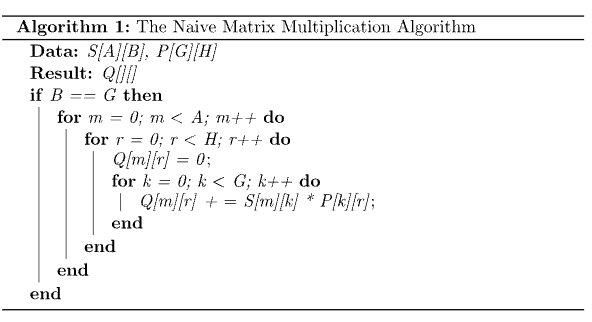